## ЗАДАНИЕ
Нефть.
В этом задании мы попробуем проанализировать цену нефть начиная с 1987 года и выявить возможные зависимости от экономических кризисов.
Данные по дневным ценам на нефть вы можете найти [здесь](https://datahub.io/core/oil-prices#resource-brent-daily).
Предлагается вычислить следующие показатели за все время с 1987 по н.в.:
* Проанализируйте данные и найдите точки максимальных месячных падений. Сопоставьте их с периодами экономических кризисов (за подсказкой можно обратиться [сюда](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%80%D0%B8%D0%B7%D0%B8%D1%81#%D0%9A%D1%80%D0%B8%D0%B7%D0%B8%D1%81%D1%8B_%D0%B2_%D0%B8%D1%81%D1%82%D0%BE%D1%80%D0%B8%D0%B8)) и поделитесь своими выводами.
* Проанализируйте интервалы между максимальными падениями: это будут “[циклы кризисов](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%86%D0%B8%D0%BA%D0%BB%D1%8B)”, попробуйте найти закономерности в них.
* Включите режим “Спекулянт” и найдите “самый выгодный месяц” (опять-таки за все время с 1987 г.) - вычислите на сколько процентов вы могли увеличить свой капитал за последовательные 30 дней (например, с 1 января по 30 января, со 2 по 31, с 3 по 1 февраля и т. п.), если бы заранее знали, как поведёт себя цена на нефть и могли бы перекладывать свои сбережения из долларов в нефть или обратно каждый вечер

# Решение

## Кризисы:
[Ссылка из задания](https://ru.wikipedia.org/wiki/Экономический_кризис#Кризисы_в_истории)


[Азиатский финансовый кризис](https://ru.wikipedia.org/wiki/Азиатский_финансовый_кризис) - (июль 1997 - конец 1998)

[Экономический кризис в России](https://ru.wikipedia.org/wiki/Экономический_кризис_в_России_(1998)) - (август 1998 - конец 1998?)

[Аргентинский экономический кризис](https://ru.wikipedia.org/wiki/Аргентинский_экономический_кризис) - (24 октября 1999 - 14 ноября 2002)

Цементный кризис - (2006—2008)

[Мировой финансовый кризис](https://ru.wikipedia.org/wiki/Мировой_финансово-экономический_кризис) - (2008 - 2011)

[Валютный кризис в России](https://ru.wikipedia.org/wiki/Валютный_кризис_в_России_(2014—2015)) - (2014 - 2015)

Короновирусная рецессия - (2020)




## Циклы кризисов:

[Циклы кризисов](https://ru.wikipedia.org/wiki/Экономические_циклы)

## Создание DataSet с помощью Pandas:



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
%matplotlib inline
#Вывод неограниченного числа столбцов
pd.options.display.max_columns = None
# pd.set_option('display.max_columns', None)
#Вывод неограниченного числа строк
pd.options.display.max_rows = None
#Кол-во символов для отображения
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
from datetime import timedelta

In [ ]:
df = pd.read_csv('https://datahub.io/core/oil-prices/r/brent-daily.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

## Первичный анализ датасета

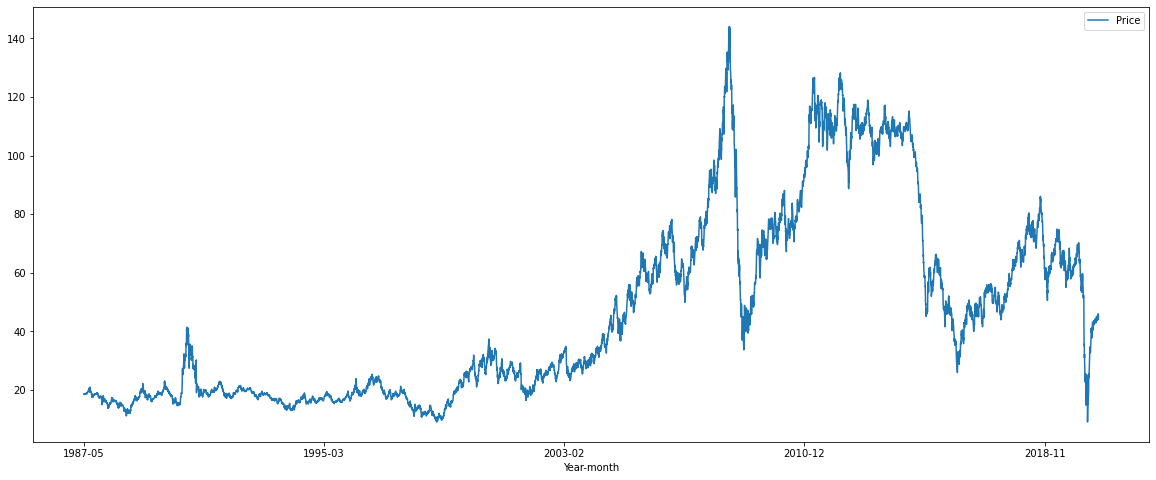

In [ ]:
df['Year-month'] = df['Date'].dt.strftime('%Y-%m')
df.groupby('Year-month')['Price'].min()
df.plot(x='Year-month', y='Price',figsize=(20,8))


In [ ]:
# Разница в цене с последующим днём.
delta=list(df['Price'][1:].values - df['Price'][0:-1].values)
delta.append(0)     # Добавляем 0 для последнего дня выборки.
df['delta_next_day']=delta    # Добавляем к таблице столбец с изменением цены в следующий день.
df.head()

,Date,Price,Year-month,delta_next_day
0,1987-05-20,18.63,1987-05,-0.18
1,1987-05-21,18.45,1987-05,0.10
2,1987-05-22,18.55,1987-05,0.05
3,1987-05-25,18.60,1987-05,0.03
4,1987-05-26,18.63,1987-05,-0.03


In [ ]:
#Группировка по месяцам и кол-ву дней в месяце в набора данных. Видно, что в месяцах есть пропущенные дни.
gp = df.groupby([df.Date.dt.year.rename('year'), df.Date.dt.month.rename('month')])
gp = gp.Price.count()
gp[:8]

year  month
1987  5         8
      6        21
      7        23
      8        21
      9        22
      10       22
      11       21
      12       22
Name: Price, dtype: int64

## Режим 'Спекулянт' сравнение и анализ месяцев

In [ ]:
def profit_start_stop(start,stop,data):
  """
  Считает максимальный профит в интервале записей от start до stop
  """
  delta_i = data.iloc[start:stop]['delta_next_day'] 
  price_i = data.iloc[start:stop]['Price']
  profit = 1
  for price,delta in zip(price_i,delta_i):
    if delta > 0:
      profit *= (1 + delta/price)
  return profit

In [ ]:
def get_profit_through_month(index_start,data):
    """
    Возвращает максимальный относительный профит за месяц, начиная со дня с индексом index_start из датасета.
    Если последний день отстутвует в данных, то берем первый предшествующий ему в данных.
    """
    date_end = data.loc[index_start,'Date'] + dt.timedelta(30)
    if index_start > (data.shape[0] - 30):                # Если окно в месяц выходит за пределы доступных данных, возвращем 0.
      return 0                                        
    elif date_end in  data['Date'].values:              # Если существует дата на месяц вперед, то используем её.
      index_end = df[df['Date'] == date_end].index[0]
      return profit_start_stop(index_start,index_end,data)
    else:                                               # Даты на месяц вперед нет, поэтому ищем в датасете первую ей предшествующую.
      while date_end not in  df['Date'].values:    
        date_end -= dt.timedelta(days = 1)
      index_end = df[df['Date'] == date_end].index[0]
      return profit_start_stop(index_start,index_end,data)

In [ ]:
# Добавляем столбец с максимальным относительным месячным профитом для каждого дня.
df['month_further_profit'] = [get_profit_through_month(i,df) for i in df.index]
df.head()

,Date,Price,Year-month,delta_next_day,month_further_profit
0,1987-05-20,18.63,1987-05,-0.18,1.048096
1,1987-05-21,18.45,1987-05,0.10,1.048096
2,1987-05-22,18.55,1987-05,0.05,1.042446
3,1987-05-25,18.60,1987-05,0.03,1.042373
4,1987-05-26,18.63,1987-05,-0.03,1.040694


In [ ]:
# Начало самого эффективного месяца вместе с лучшим инсайдерским Телеграмм-каналом на свете

print(" Самый лучший день начала инсайдерского спекулирования: {}".format(df[df['month_further_profit'] == df['month_further_profit'].max()]['Date'].dt.strftime('%Y-%m-%d').values[0]))
print(" Последний день месячного спекулирования: {}".format((df[df['month_further_profit'] == df['month_further_profit'].max()]['Date'] + dt.timedelta(days=30)).dt.strftime('%Y-%m-%d').values[0]))
print(" За месяц мы увеличили бы свой капитал на {} %".format(round(df['month_further_profit'].max() * 100)))

 Самый лучший день начала инсайдерского спекулирования: 2020-04-01
 Последний день месячного спекулирования: 2020-05-01
 За месяц мы увеличили бы свой капитал на 447 %


## Анализ интервалов падений цены на нефть



In [ ]:
def get_month_down(index,data):
    """
    Расчитывает относительное месячное падение цены для каждого дня.
    Если выходим за рамки дат в окне "вперед", то выдаем 0. Если цена дня+30 не существует, берем последнюю, существующую до искомой даты.
    """
    date_end = data.loc[index,'Date'] + dt.timedelta(30)
    if index > (data.shape[0]-30):
        return 0                                
    elif date_end in  data['Date'].values:
        return [(float(data.loc[data['Date'] == date_end,'Price']) - data.loc[index,'Price']) / data.loc[index,'Price'],date_end]
    else:
       while date_end not in  df['Date'].values:    
           date_end-=dt.timedelta(days=1)
       return [(float(data.loc[data['Date'] == date_end,'Price']) - data.loc[index,'Price']) / data.loc[index,'Price'],date_end]

In [ ]:
def data_broken_barh_list(data,column_delta_price):
  """
    Составляет  список кортежей (дата_начала_падения, продолжительность) 
    для 150 максимальных падений цен 
  """
  index_bad_month_start = data.loc[data['res']!=0,column_delta_price].sort_values().index.values[0:150]
  data_broken_barh=[]
  for i in index_bad_month_start:
    #В Строке ниже должна быть Data
    stop = data.iloc[i]['data_end']
    data_broken_barh.append(stop)
  return data_broken_barh

In [ ]:
# Рассчитываем относительное падение цены за окно в один месяц
df['Date'] = df['Date'].dt.date    
df['res'] = [get_month_down(i,df) for i in df.index]
df.loc[df['res']!=0,'data_end'] = [i[1] for i in df.loc[df['res']!=0,'res']]
df.loc[df['res']!=0,'month_further_delta'] = [i[0] for i in df.loc[df['res']!=0,'res']]

# Данные с датами максимальных падений цен
data_broken_barh = data_broken_barh_list(df,'month_further_delta')
df.drop('res',axis=1,inplace=True)

In [ ]:
df.head()

,Date,Price,Year-month,delta_next_day,month_further_profit,data_end,month_further_delta
0,1987-05-20,18.63,1987-05,-0.18,1.048096,1987-06-19,0.022544
1,1987-05-21,18.45,1987-05,0.10,1.048096,1987-06-19,0.032520
2,1987-05-22,18.55,1987-05,0.05,1.042446,1987-06-19,0.026954
3,1987-05-25,18.60,1987-05,0.03,1.042373,1987-06-24,0.008065
4,1987-05-26,18.63,1987-05,-0.03,1.040694,1987-06-25,0.003757


### График сопоставления периодов падения цен на нефть и экономических кризиcов

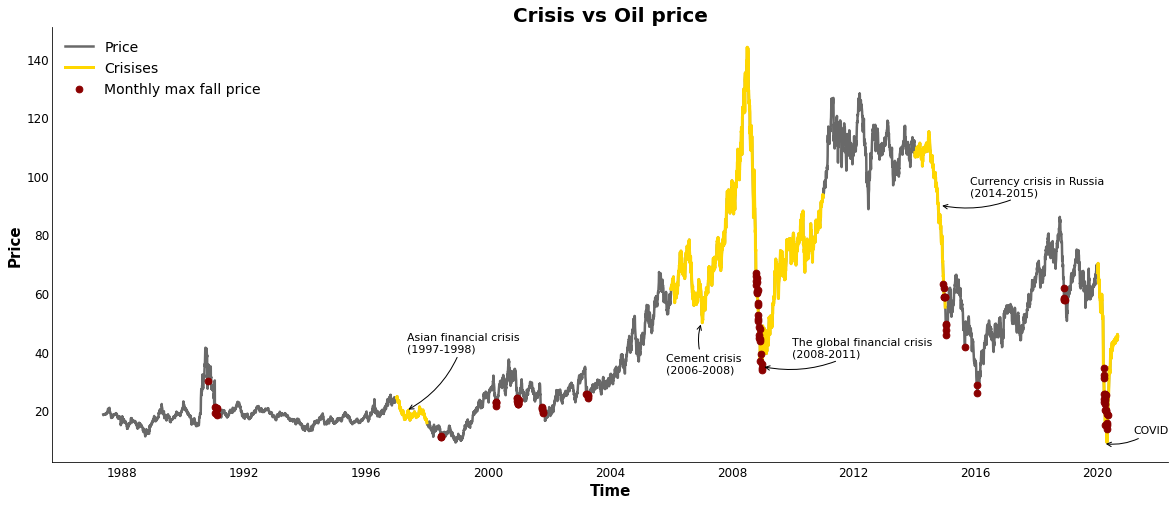

In [ ]:
plt.figure(figsize=(20,8))   
plt.title('Crisis vs Oil price', fontsize=20,fontweight="bold") 
plt.xlabel('Time', fontsize=15, fontweight="bold") 
plt.ylabel('Price', fontsize=15, fontweight="bold") 


# Периоды кризисов и их продолжительность
x_crisis = [(dt.date(2008,1,1),dt.timedelta(days=365*3)),(dt.date(1997,1,1),dt.timedelta(days=365)),
      (dt.date(2020,1,1),dt.timedelta(days=365)),(dt.date(2014,1,1),dt.timedelta(days=365))]
 

# График цен на нефть
plt.plot(df['Date'],df['Price'],color='dimgray',zorder=1,linewidth=2.5, label='Price')

# Подписи для кризисов
plt.annotate("Asian financial crisis\n(1997-1998)", xy=(dt.date(1997,5,1), 20),  xycoords='data',
            xytext=(0, 59), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=11)

plt.annotate("Cement crisis\n(2006-2008)", xy=(dt.date(2007,1,1), 50),  xycoords='data',
            xytext=(-35, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=11)

plt.annotate("The global financial crisis\n(2008-2011)", xy=(dt.date(2009,1,1), 35),  xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=11)
plt.annotate("Currency crisis in Russia\n(2014-2015)", xy=(dt.date(2014,11,1), 90),  xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=11)
plt.annotate("COVID", xy=(dt.date(2020,3,15), 8.7),  xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=11)

# Графики для кризисов
for start in x_crisis:
    start_period = start[0]
    end_period = start[0]+start[1]
    mask = (df['Date']>=start_period)&(df['Date']<=end_period)
    plt.plot(df.loc[mask,'Date'],df.loc[mask,'Price'] , color='gold',linewidth=3,zorder=2, label='_nolegend_')


# График с цементным кризисом
start_period = dt.date(2006,1,1)
end_period = dt.date(2008,1,1)
mask = (df['Date']>=start_period)&(df['Date']<=end_period)
plt.plot(df.loc[mask,'Date'],df.loc[mask,'Price'] , color='gold',linewidth=3,zorder=2, label='Crisises')

# Точки максимальных месячных падений цен на нефть
plt.scatter(df.loc[df['Date'].isin((data_broken_barh)),'Date'],df.loc[df['Date'].isin((data_broken_barh)),'Price'], s=45, c='darkred', label='monthly_min_fall',zorder=3)

# Удаляем правую и верхнюю рамку
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Удаление сетки
plt.grid(False)
plt.gca().legend(('Price','Crisises','Monthly max fall price'),loc= 'upper left',framealpha=0.0,fontsize=14)

# Удаление вертикальных меток 
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.gca().tick_params(axis='both', which='both', length=0)

# Размер подписей значениий осей
plt.gca().xaxis.set_tick_params(labelsize='large')
plt.gca().yaxis.set_tick_params(labelsize='large')
plt.show() 

## Выводы: корреляция между ценами на нефть и мировыми кризисами

1. Между точками падения есть точки взлетов (максимальных значений цен).
2. Циклы кризисов носят случайный характер. Они различны по продолжительности и глубине.
3. Максимальные ежемесячные минимальные падения цен совпадают с глобальным фин кризисом, валютным кризисом в России и кризисом COVID.Это означает, что экономические и финансовые кризисы ведут к снижению цен на нефть как следствие снижения спроса на нефть. 
4. Сильное падение цены на нефть заметно в 1991 году, после окончания операции США и союзников "Буря в пустыне". Первоначальный ее взлет до 41.15 долллара в 1990 был обусловлен вторжением Ирака в Кувейт. 
5. Интересно, что есть точки макс ежемесячных падений цен между 2000 и 2004 годами. В период до 1998 года на цену нефти влияли в основном политические факторы в виде политики эмбарго ОПЕК и конфликтов на Ближнем Востоке. Оптимальный уровень ценового коридора (22—
28 долл./барр.) поддерживался на протяжении достаточно длительного времени механизмом квот для стран
ОПЕК, поставляющих почти 40% нефти на мировой
рынок. В 2000-2004 годах скачки цен на нефть начинают быть связаны с влиянием процентной ставки, курса доллара по отношению к евро и йене, а также показателем изменения стратегических и коммерческих запасов запасов нефти в США. В этот период номинальная процентная ставка снизилась до самого низкого уровня за последние 42 года, а реальная процентная ставка вообще оказалась нулевой. Таким образом, финансовый фактор стал основным для изменения цен на нефть.  
6. В 2014 году падение началось с объявления Сайдовской Аравии и ОАЭ снижения цен на 20% для азиатских потребителей в августе 2014-го и ускорилось после отказа ОПЕК уменьшать квоты добычи в октябре 2014-го. 
7. Последний цикл падения цены на нефть в 2020 году обусловлен снижением потребления нефти из-за эпидемии COVID-19.

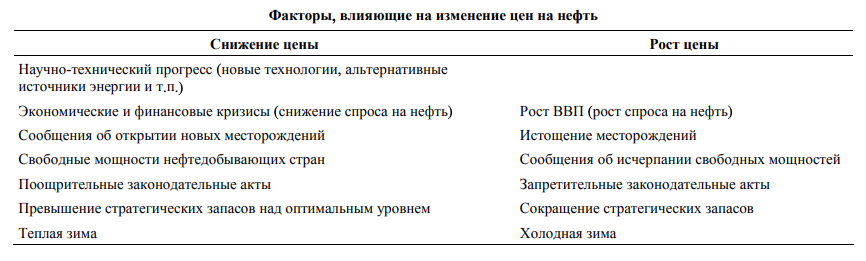










На рисунке ниже выделены периоды примерно по 10 лет, в которых можно видеть цикличность изменения тренда цены на нефть. Точки с максимальным месячным падением цен встречаются во всех подобных циклах.

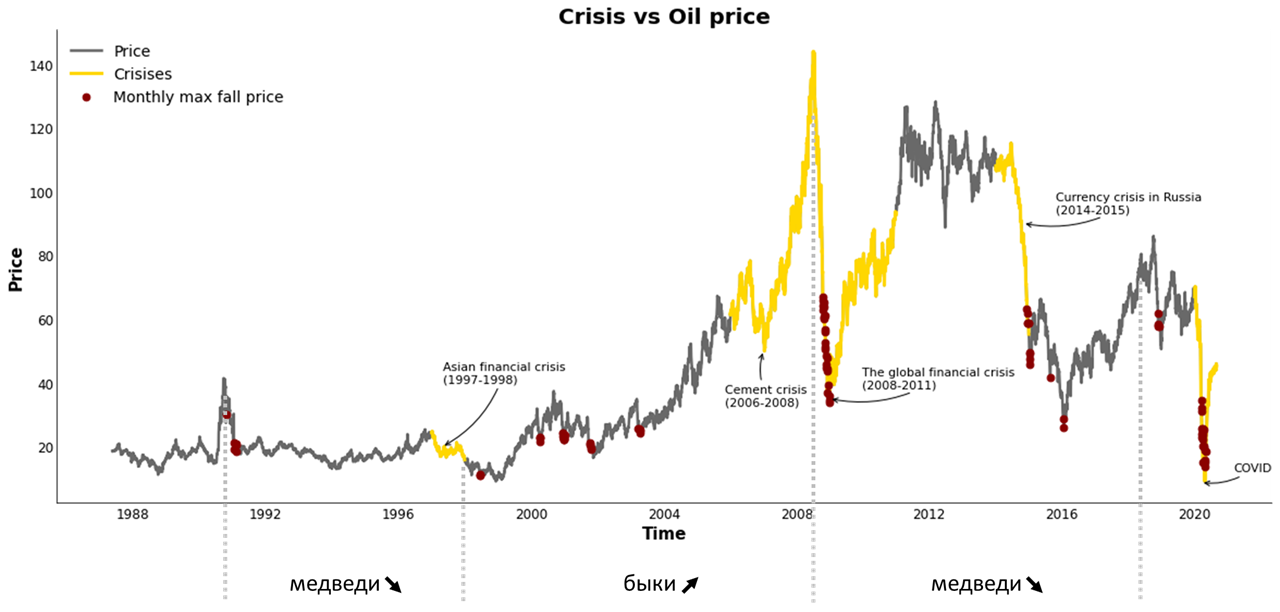